In [19]:
import urllib.error,urllib.request,urllib.parse
import json

In [20]:
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+ '87f48ef9'

In [21]:
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [22]:
def save_poster(json_data):
    import os
    title=json_data['Title']
    poster_url=json_data['Poster']
    poster_file_extension=poster_url.split('.')[-1]
    poster_data=urllib.request.urlopen(poster_url).read()
    save_loc=os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(save_loc):
        os.mkdir(save_loc)
    filename=save_loc+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [23]:
def save_in_database(json_data):
    filename=input("enter the name of file")
    filename=filename+'.sqlite'
    import sqlite3
    conn=sqlite3.connect(str(filename))
    cur=conn.cursor()
    title=json_data['Title']
    if json_data['Year']!='N/A':
        year = int(json_data['Year'])
    if json_data['Runtime']!='N/A':
        runtime = int(json_data['Runtime'].split()[0])
    if json_data['Country']!='N/A':
        country = json_data['Country']
    if json_data['Metascore']!='N/A':
        metascore = float(json_data['Metascore'])
    else:
        metascore=-1
    if json_data['imdbRating']!='N/A':
        imdb_rating = float(json_data['imdbRating'])
    else:
        imdb_rating=-1
    
    cur.execute('''CREATE TABLE IF NOT EXISTS MovieInfo 
    (Title TEXT, Year INTEGER, Runtime INTEGER, Country TEXT, Metascore REAL, IMDBRating REAL)''')
    
    cur.execute('SELECT Title FROM MovieInfo WHERE Title = ? ', (title,))
    row = cur.fetchone()
    
    if row is None:
        cur.execute('''INSERT INTO MovieInfo (Title, Year, Runtime, Country, Metascore, IMDBRating)
                VALUES (?,?,?,?,?,?)''', (title,year,runtime,country,metascore,imdb_rating))
    else:
        print("Record already found. No update made.")
    
    # Commits the change and close the connection to the database
    conn.commit()
    conn.close()
    

In [24]:
def print_database(database):
    import sqlite3
    conn=sqlite3.connect(str(database))
    cur=conn.cursor()
    
    for row in cur.execute('SELECT * FROM MovieInfo'):
        print(row)
    conn.close()

In [25]:
def save_in_excel(filename, database):
    
    if filename.split('.')[-1]!='xls' and filename.split('.')[-1]!='xlsx':
        print ("Filename does not have correct extension. Please try again")
        return None
    
    import pandas as pd
    import sqlite3
      
    
    conn = sqlite3.connect(str(database))
    
    
    df=pd.read_sql_query("SELECT * FROM MovieInfo", conn)
    conn.close()
    
    df.to_excel(filename,sheet_name='Movie Info')

In [26]:
def search_movie(title):
    if len(title) < 1 or title=='quit': 
        print("Goodbye now...")
        return None

    try:
        url = serviceurl + urllib.parse.urlencode({'t': title})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            
            e
            if json_data['Poster']!='N/A':
                poster_yes_no=input ('Poster of this movie can be downloaded. Enter "yes" or "no": ').lower()
                if poster_yes_no=='yes':
                    save_poster(json_data)
            
            save_database_yes_no=input ('Save the movie info in a local database? Enter "yes" or "no": ').lower()
            if save_database_yes_no=='yes':
                save_in_database(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [27]:

title  =  input('\nEnter the name of a movie ( enter the \'quit\' or hit ENTER to quit):')
if((len(title)<1) or (title=='quit')): 
    print("Goodbye now...")
else:
    search_movie(title)



Enter the name of a movie ( enter the 'quit' or hit ENTER to quit):Titanic
Retrieving the data of "Titanic" now... 
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish
Country: USA
Awards: Won 11 Oscars. Another 111 wins & 77 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 908,525
imdbID: tt0120338
--------------------------------------------------
Poster of this movie can be downloaded. Enter "yes" or "no": yes
Save the movie info in a local database? Enter "yes"

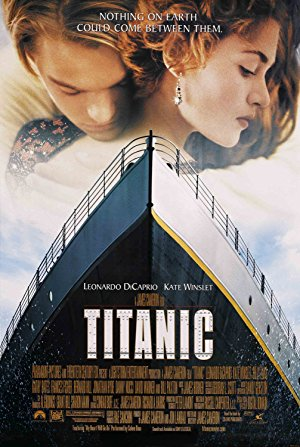

In [28]:
from IPython.display import Image
Image("Posters/Titanic.jpg")

In [29]:
print_database('Titanic.sqlite')

('Titanic', 1997, 194, 'USA', 75.0, 7.8)


In [31]:
title  =  input('\nEnter the name of a movie ( enter the \'quit\' or hit ENTER to quit):')
if((len(title)<1) or (title=='quit')): 
    print("Goodbye now...")
else:
    search_movie(title)


Enter the name of a movie ( enter the 'quit' or hit ENTER to quit):Black Panther
Retrieving the data of "Black Panther" now... 
--------------------------------------------------
Title: Black Panther
Year: 2018
Rated: PG-13
Released: 16 Feb 2018
Runtime: 134 min
Genre: Action, Adventure, Sci-Fi
Director: Ryan Coogler
Writer: Ryan Coogler, Joe Robert Cole, Stan Lee (based on the Marvel comics by), Jack Kirby (based on the Marvel Comics by)
Actors: Chadwick Boseman, Michael B. Jordan, Lupita Nyong'o, Danai Gurira
Plot: T'Challa, heir to the hidden but advanced kingdom of Wakanda, must step forward to lead his people into a new future and must confront a challenger from his country's past.
Language: Swahili, Nama, English, Xhosa, Korean
Country: USA, South Africa, South Korea, Australia
Awards: 14 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.4/10'}, {'Source': 'Rotten Tomatoes', 'Value': '97%'}, {'Source': 'Metacritic', 'Value': '88/100'}]
Metascore: 88
imdbRa

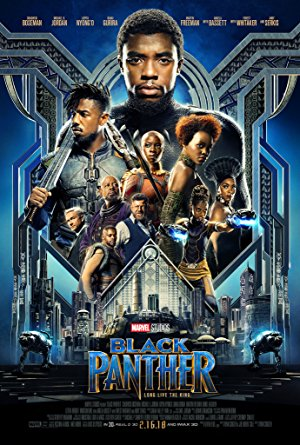

In [32]:
from IPython.display import Image
Image("Posters/Black Panther.jpg")